### Data Import

In [72]:
import pandas as pd

df = pd.read_csv("df_car_campaign_data_2022-09-30_2024-09-30.csv")

In [73]:
df.head(10)

,market,strategy,channel,tactic,device type,day_of_week,date,impressions,actions,dt
0,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,Retargeting,Desktop,Friday,2022-09-30,2,0.0,1.0
1,"Champaign-Springfield-Decatur\, IL",L/Certified,Connected TV,CDP Custom audiences,Tablet,Friday,2022-09-30,2,0.0,1.0
2,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,Retargeting,Mobile,Friday,2022-09-30,1,0.0,0.0
3,"Champaign-Springfield-Decatur\, IL",L/Certified,Connected TV,Retargeting,Tablet,Friday,2022-09-30,0,0.0,0.0
4,"Champaign-Springfield-Decatur\, IL",New Car,Video,Retargeting,Desktop,Friday,2022-09-30,0,0.0,0.0
5,"Champaign-Springfield-Decatur\, IL",New Car,Video,CDP Custom audiences,Desktop,Friday,2022-09-30,0,0.0,0.0
6,"Champaign-Springfield-Decatur\, IL",L/Certified,Video,Retargeting,Desktop,Friday,2022-09-30,0,0.0,0.0
7,"Champaign-Springfield-Decatur\, IL",L/Certified,Video,Retargeting,Tablet,Friday,2022-09-30,1,0.0,1.0
8,"Champaign-Springfield-Decatur\, IL",L/Certified,Connected TV,CDP Custom audiences,Desktop,Friday,2022-09-30,0,0.0,0.0
9,"Champaign-Springfield-Decatur\, IL",L/Certified,Banner Ads,Hand Off Targeting,Tablet,Friday,2022-09-30,1,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432266 entries, 0 to 5432265
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   market       object 
 1   strategy     object 
 2   channel      object 
 3   tactic       object 
 4   device type  object 
 5   day_of_week  object 
 6   date         object 
 7   impressions  int64  
 8   actions      float64
 9   dt           float64
dtypes: float64(2), int64(1), object(7)
memory usage: 414.4+ MB


In [5]:
df['state'] = df['market'].str.replace(r'\\', '', regex=True).str.extract(r',\s*(\w{2})$')

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M').astype(str)

In [7]:
df.head(10)

,market,strategy,channel,tactic,device type,day_of_week,date,impressions,actions,dt,state,year_month
0,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,Retargeting,Desktop,Friday,2022-09-30,2,0.0,1.0,IL,2022-09
1,"Champaign-Springfield-Decatur\, IL",L/Certified,Connected TV,CDP Custom audiences,Tablet,Friday,2022-09-30,2,0.0,1.0,IL,2022-09
2,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,Retargeting,Mobile,Friday,2022-09-30,1,0.0,0.0,IL,2022-09
3,"Champaign-Springfield-Decatur\, IL",L/Certified,Connected TV,Retargeting,Tablet,Friday,2022-09-30,0,0.0,0.0,IL,2022-09
4,"Champaign-Springfield-Decatur\, IL",New Car,Video,Retargeting,Desktop,Friday,2022-09-30,0,0.0,0.0,IL,2022-09
5,"Champaign-Springfield-Decatur\, IL",New Car,Video,CDP Custom audiences,Desktop,Friday,2022-09-30,0,0.0,0.0,IL,2022-09
6,"Champaign-Springfield-Decatur\, IL",L/Certified,Video,Retargeting,Desktop,Friday,2022-09-30,0,0.0,0.0,IL,2022-09
7,"Champaign-Springfield-Decatur\, IL",L/Certified,Video,Retargeting,Tablet,Friday,2022-09-30,1,0.0,1.0,IL,2022-09
8,"Champaign-Springfield-Decatur\, IL",L/Certified,Connected TV,CDP Custom audiences,Desktop,Friday,2022-09-30,0,0.0,0.0,IL,2022-09
9,"Champaign-Springfield-Decatur\, IL",L/Certified,Banner Ads,Hand Off Targeting,Tablet,Friday,2022-09-30,1,0.0,0.0,IL,2022-09


### Cleaning Data

In [9]:
from scipy.stats import zscore

# Apply only to numerical columns
numeric_cols = ['impressions', 'actions', 'dt']
df_zscores = df[numeric_cols].apply(zscore)

# Flag rows where any z-score is above a threshold (e.g, 2.5)
df['anomaly_outlier'] = (df_zscores.abs() > 2.5).any(axis=1)

In [10]:
df['strategy'] = df['strategy'].replace({
    'L/Certified': 'Certified',
    'New': 'New_Car'
})

In [11]:
df_cleaned = df[~((df['impressions']==0) & (df['actions']==0) & (df['dt'] == 0))]

print("Before Removal:", df.shape)
print("After Removal:", df_cleaned.shape)

Before Removal: (5432266, 13)
After Removal: (4697831, 13)


In [15]:
df_cleaned.head(10)

,market,strategy,channel,tactic,device type,day_of_week,date,impressions,actions,dt,state,year_month,anomaly_outlier
0,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,Retargeting,Desktop,Friday,2022-09-30,2,0.0,1.0,IL,2022-09,False
1,"Champaign-Springfield-Decatur\, IL",Certified,Connected TV,CDP Custom audiences,Tablet,Friday,2022-09-30,2,0.0,1.0,IL,2022-09,False
2,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,Retargeting,Mobile,Friday,2022-09-30,1,0.0,0.0,IL,2022-09,False
7,"Champaign-Springfield-Decatur\, IL",Certified,Video,Retargeting,Tablet,Friday,2022-09-30,1,0.0,1.0,IL,2022-09,False
9,"Champaign-Springfield-Decatur\, IL",Certified,Banner Ads,Hand Off Targeting,Tablet,Friday,2022-09-30,1,0.0,0.0,IL,2022-09,False
10,"Champaign-Springfield-Decatur\, IL",Certified,Connected TV,Retargeting,Mobile,Friday,2022-09-30,1,0.0,1.0,IL,2022-09,False
14,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,Prospecting,Desktop,Friday,2022-09-30,1,0.0,0.0,IL,2022-09,False
15,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,CDP Custom audiences,Tablet,Friday,2022-09-30,1,0.0,0.0,IL,2022-09,False
16,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,Hand Off Targeting,Mobile,Friday,2022-09-30,1,0.0,0.0,IL,2022-09,False
17,"Champaign-Springfield-Decatur\, IL",Certified,Banner Ads,Retargeting,Tablet,Friday,2022-09-30,1,0.0,0.0,IL,2022-09,False


In [23]:
df.sample(n=10)

,market,strategy,channel,tactic,device type,day_of_week,date,impressions,actions,dt,state,year_month,anomaly_outlier
4769120,"Lexington\, KY",New Car,Video,Retargeting,Tablet,Friday,2024-07-19,22,0.0,0.0,KY,2024-07,False
2446959,"San Diego\, CA",New Car,Video,Prospecting,Mobile,Saturday,2023-10-14,7671,4.0,73.0,CA,2023-10,True
1607217,"Harrisburg\, PA",New Car,Audio,Prospecting,Desktop,Friday,2023-06-16,463,5.0,1.0,PA,2023-06,False
1987877,"Columbus\, OH",New Car,Video,CDP Custom audiences,Desktop,Saturday,2023-08-12,853,0.0,31.0,OH,2023-08,False
3373719,"Columbus\, OH",Certified,Banner Ads,Retargeting,Desktop,Tuesday,2024-02-13,10305,10.0,14.0,OH,2024-02,False
225750,"Detroit\, MI",New Car,Video,Prospecting,Mobile,Thursday,2022-11-10,626,0.0,7.0,MI,2022-11,False
1751887,"Peoria\, IL",New Car,Video,Retargeting,Desktop,Saturday,2023-07-08,1831,2.0,29.0,IL,2023-07,False
130536,"Anchorage\, AK",Certified,Connected TV,Retargeting,Tablet,Sunday,2022-10-23,0,0.0,0.0,AK,2022-10,False
1236251,"Savannah\, GA",Certified,Banner Ads,Prospecting,Tablet,Wednesday,2023-04-19,14,0.0,0.0,GA,2023-04,False
5269658,"Green Bay\, WI",New Car,Banner Ads,Prospecting,Tablet,Friday,2024-09-13,261,1.0,3.0,WI,2024-09,False


### Which markets show the highest potential for growth based on current delivered traffic (dt)?

In [26]:
market_df = df_cleaned.groupby('market')['dt'].sum()
market_df = market_df.sort_values(ascending=False).reset_index()

print("Top 10 Markets by Delivered Traffic:\n\n", market_df.head(10))

Top 10 Markets by Delivered Traffic:

                        market         dt
0               New York\, NY  2171002.0
1            Los Angeles\, CA  1629778.0
2          San Francisco\, CA  1017006.0
3                Chicago\, IL   921412.0
4       Dallas-Ft. Worth\, TX   902301.0
5  Miami- Ft. Lauderdale\, FL   836843.0
6             Washington\, DC   731902.0
7                Houston\, TX   723672.0
8           Philadelphia\, PA   664059.0
9                Atlanta\, GA   661679.0


### Are there specific days or periods that demonstrate significantly better performance in terms of delivered traffic?

In [29]:
day_df = df_cleaned.groupby('day_of_week')['dt'].sum().sort_values(ascending=False).reset_index()
month_df = df_cleaned.groupby('year_month')['dt'].sum().sort_values(ascending=False).reset_index()

print("Delivered Traffic By Day of Week:\n\n", day_df)
print("Delivered Traffic By Month:\n\n", month_df)

Delivered Traffic By Day of Week:

   day_of_week         dt
0   Saturday   4483901.0
1   Sunday     4375749.0
2   Monday     4364999.0
3   Friday     4364798.0
4   Tuesday    4339176.0
5   Wednesday  4311527.0
6   Thursday   4293165.0
Delivered Traffic By Month:

    year_month         dt
0     2024-04  1839794.0
1     2024-05  1813330.0
2     2024-06  1776964.0
3     2024-09  1723559.0
4     2024-07  1670795.0
5     2024-08  1665983.0
6     2024-03  1570293.0
7     2024-01  1483976.0
8     2023-07  1454246.0
9     2023-10  1434553.0
10    2024-02  1382210.0
11    2023-11  1373338.0
12    2023-09  1327581.0
13    2023-08  1296872.0
14    2023-12  1267893.0
15    2023-05  1185681.0
16    2023-06  1161814.0
17    2023-03   987440.0
18    2023-04   984448.0
19    2023-01   955923.0
20    2023-02   784786.0
21    2022-12   542015.0
22    2022-11   460273.0
23    2022-10   377012.0
24    2022-09    12536.0


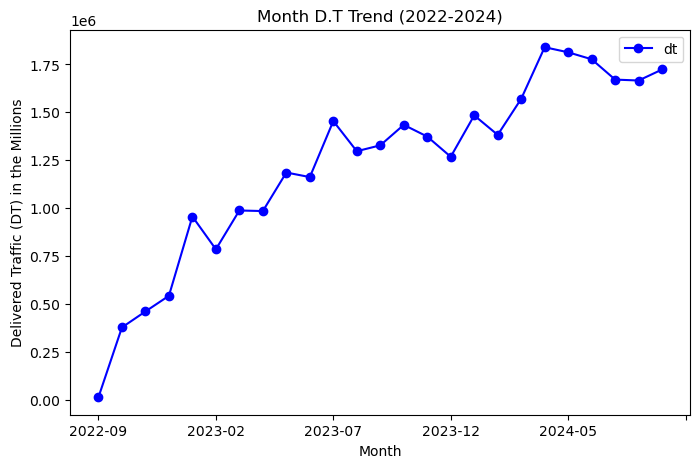

In [30]:
import matplotlib.pyplot as plt

month_df = month_df.sort_values(by='year_month', ascending=True)


month_df.plot(figsize=(8,5),
              x='year_month', 
              y='dt', 
              kind='line',
              title="Month D.T Trend (2022-2024)",
              xlabel="Month",
              ylabel="Delivered Traffic (DT) in the Millions",
              color = "blue",
              marker='o')
plt.show()

### What type of device (Mobile, Desktop, Tablet) is most effective in driving customer engagement and conversions?

In [32]:
device = df_cleaned.groupby('device type').agg({
    'impressions': 'sum',
    'actions': 'sum',
    'dt': 'sum'}).reset_index()

device['dt_per_impression'] = device['dt'] / (device['impressions'] + 1e-6)
device['action_rate'] = device['actions'] / (device['impressions'] + 1e-6)

print("Device Effectiveness:\n", device.sort_values(by='dt_per_impression', ascending=False))

Device Effectiveness:
     device type  impressions    actions          dt  dt_per_impression  \
2        Mobile   3929467776  5952402.0  17196644.0           0.004376   
3        Tablet    252072847   315853.0    797161.0           0.003162   
1       Desktop   5700918070  4610523.0  12532425.0           0.002198   
0  Connected TV     87921017      525.0      6974.0           0.000079   
4       Unknown     13890191       16.0       111.0           0.000008   

   action_rate  
2     0.001515  
3     0.001253  
1     0.000809  
0     0.000006  
4     0.000001  


### How do different advertising tactics influence engagement and delivered traffic specifically for new cars vs. certified pre-owned vehicles?

In [34]:
tactic_summary = df_cleaned[df_cleaned['strategy'].isin(['New Car', 'Certified'])].groupby(['strategy', 'tactic']).agg({
    'impressions': 'sum',
    'actions': 'sum',
    'dt': 'sum'
}).reset_index()
tactic_summary['dt_per_impression'] = tactic_summary['dt'] / (tactic_summary['impressions'] + 1e-6)
tactic_summary['action_rate'] = tactic_summary['actions'] / (tactic_summary['impressions'] + 1e-6)

print("Tactic effectiveness by product strategy:\n", tactic_summary.sort_values(by=['strategy', 'dt_per_impression'], ascending=[True, False]), "\n")

Tactic effectiveness by product strategy:
     strategy                tactic  impressions    actions         dt  \
1  Certified    Hand Off Targeting     34665946   200517.0   375959.0   
0  Certified  CDP Custom audiences    508310406   438904.0  1145603.0   
3  Certified           Retargeting    915555397   997573.0  2026502.0   
2  Certified           Prospecting    912664484   641307.0  1731485.0   
5    New Car    Hand Off Targeting    652230953  1337764.0  3704085.0   
4    New Car  CDP Custom audiences   1101187633  1192786.0  4140496.0   
6    New Car           Prospecting   2893646324  2391970.0  9203181.0   
7    New Car           Retargeting   2966008758  3678498.0  8206004.0   

   dt_per_impression  action_rate  
1           0.010845     0.005784  
0           0.002254     0.000863  
3           0.002213     0.001090  
2           0.001897     0.000703  
5           0.005679     0.002051  
4           0.003760     0.001083  
6           0.003180     0.000827  
7          

In [35]:
# Years Summary

In [36]:
df['year'] = df['date'].dt.year

df['year_quarter'] = df['date'].dt.to_period('Q').astype(str)

yearly = df.groupby('year_quarter')[['impressions', 'actions', 'dt']].sum().sort_index()
yearly = yearly.loc['2022Q4':]

yearly_change = yearly.pct_change().round(3) * 100

yearly_trend = yearly.copy()
yearly_trend[['impressions_%_change', 'actions_%_change', 'dt_%_change']] = yearly_change

print("Year to Year Trends")
display(yearly_trend)

Year to Year Trends


,impressions,actions,dt,impressions_%_change,actions_%_change,dt_%_change
year_quarter,,,,,,
2022Q4,779849842,587201.0,1379300.0,NaN,NaN,NaN
2023Q1,907656869,675360.0,2728149.0,16.4,15.0,97.8
2023Q2,1090821939,902321.0,3331943.0,20.2,33.6,22.1
2023Q3,1325813421,966314.0,4078699.0,21.5,7.1,22.4
2023Q4,1327827519,1467512.0,4075784.0,0.2,51.9,-0.1
2024Q1,1557926335,2053993.0,4436479.0,17.3,40.0,8.8
2024Q2,1448156263,2262553.0,5430088.0,-7.0,10.2,22.4
2024Q3,1541471751,1958704.0,5060337.0,6.4,-13.4,-6.8


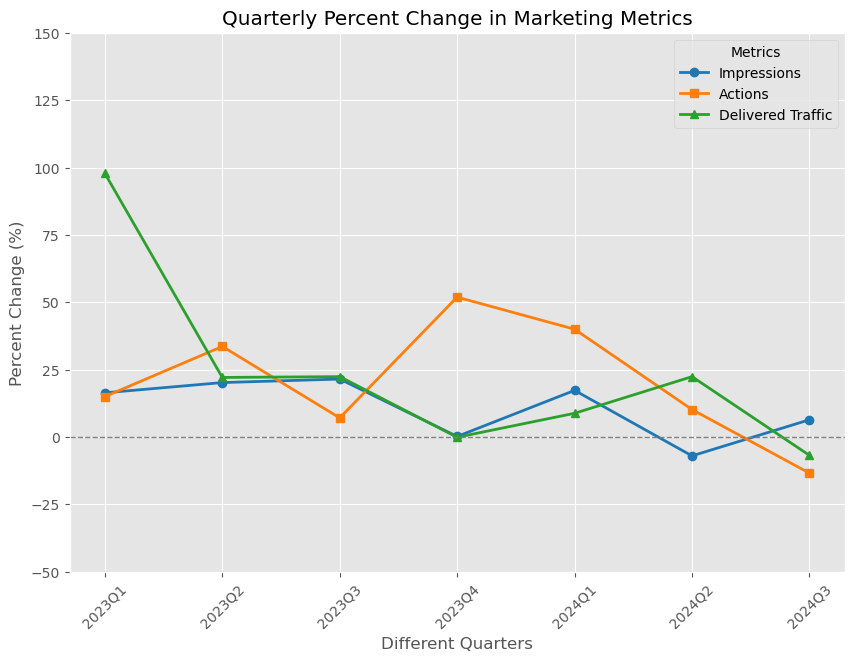

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))

plt.plot(yearly_trend.index, yearly_trend['impressions_%_change'], label="Impressions", color='tab:blue', marker='o', linewidth=2)
plt.plot(yearly_trend.index, yearly_trend['actions_%_change'], label="Actions", color='tab:orange',marker='s', linewidth=2)
plt.plot(yearly_trend.index, yearly_trend['dt_%_change'], label="Delivered Traffic", color='tab:green', marker='^', linewidth=2)

plt.title('Quarterly Percent Change in Marketing Metrics')
plt.xlabel("Different Quarters")
plt.ylabel("Percent Change (%)")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xticks(rotation=45)
plt.ylim(-50, 150)
plt.legend(title="Metrics")
plt.show()

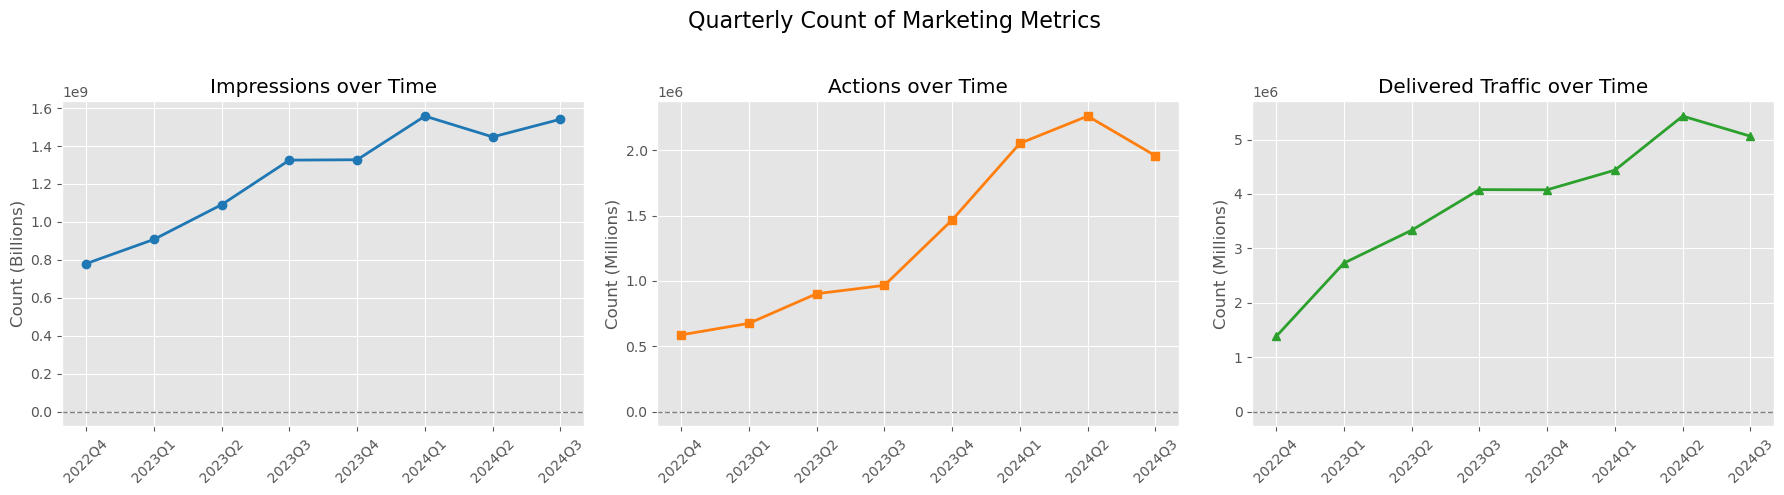

In [39]:
import matplotlib.pyplot as plt

# Set up 3 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=True)

axes[0].plot(yearly_trend.index, yearly_trend['impressions'], color='tab:blue', marker='o', linewidth=2)
axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[0].set_title('Impressions over Time')
axes[0].set_ylabel('Count (Billions)')
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(yearly_trend.index, yearly_trend['actions'], color='tab:orange', marker='s', linewidth=2)
axes[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[1].set_title('Actions over Time')
axes[1].set_ylabel('Count (Millions)')
axes[1].tick_params(axis='x', rotation=45)

axes[2].plot(yearly_trend.index, yearly_trend['dt'], color='tab:green', marker='^', linewidth=2)
axes[2].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[2].set_title('Delivered Traffic over Time')
axes[2].set_ylabel('Count (Millions)')
axes[2].tick_params(axis='x', rotation=45)

# Main title
fig.suptitle('Quarterly Count of Marketing Metrics', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

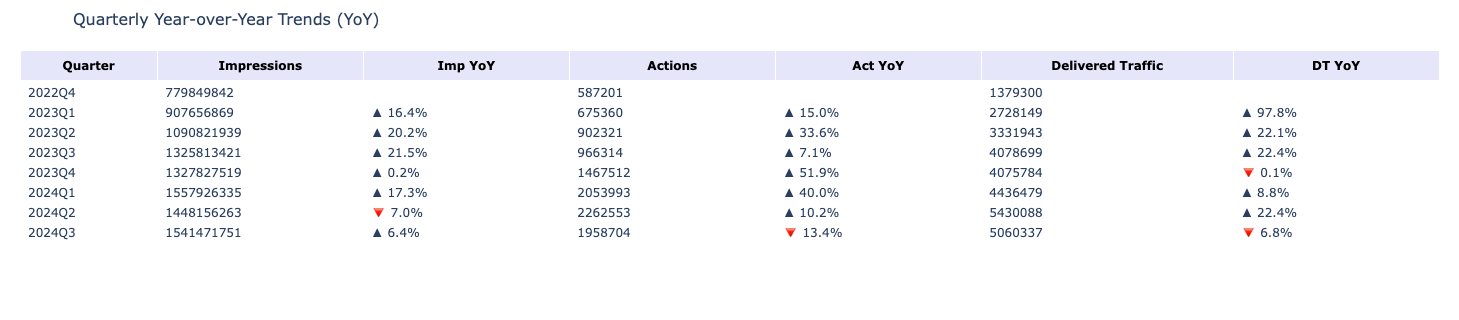

In [68]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

df_yoy = yearly_trend.reset_index()

# Define up/down arrow logic
def format_arrow(val):
    if pd.isna(val):
        return ''
    elif val > 0:
        return f'▲ {val:.1f}%'
    elif val < 0:
        return f'🔻 {abs(val):.1f}%'
    else:
        return '➖ 0.0%'

df_yoy['imp_trend'] = df_yoy['impressions_%_change'].apply(format_arrow)
df_yoy['act_trend'] = df_yoy['actions_%_change'].apply(format_arrow)
df_yoy['dt_trend']  = df_yoy['dt_%_change'].apply(format_arrow)

fig = go.Figure(data=[go.Table(
    columnwidth=[60, 90, 90, 90, 90, 110, 90],
    header=dict(
        values=["<b>Quarter</b>", "<b>Impressions</b>", "<b>Imp YoY</b>",
                "<b>Actions</b>", "<b>Act YoY</b>",
                "<b>Delivered Traffic</b>", "<b>DT YoY</b>"],
        fill_color='lavender',
        align='center',
        font=dict(color='black', size=12),
        height=30
    ),
    cells=dict(values=[
        df_yoy['year_quarter'],
        df_yoy['impressions'],
        df_yoy['imp_trend'],
        df_yoy['actions'],
        df_yoy['act_trend'],
        df_yoy['dt'],
        df_yoy['dt_trend']
    ],
        fill_color='white',
        align='left',
        font=dict(size=12)
    )
)])

# Reduce margins to shrink the overall plot
fig.update_layout(
    title='Quarterly Year-over-Year Trends (YoY)',
    title_font_size=16,
    margin=dict(l=20, r=20, t=50, b=20),
    height=320  # ✨ Control height for compactness
)
fig.show()

### What channels (Banner Ads, Connected TV, Video) and tactics (Retargeting, CDP Custom Audiences) yield the highest conversions or delivered traffic?

In [43]:
# Group by channel and tactic, summing impressions, actions, and dt
channel_tactic_summary = df.groupby(['channel', 'tactic']).agg({
    'impressions': 'sum',
    'actions': 'sum',
    'dt': 'sum'
}).reset_index()

# Calculate effectiveness ratios
channel_tactic_summary['dt_per_impression'] = channel_tactic_summary['dt'] / (channel_tactic_summary['impressions'] + 1e-6)
channel_tactic_summary['action_rate'] = channel_tactic_summary['actions'] / (channel_tactic_summary['impressions'] + 1e-6)

# Sort by highest delivered traffic
channel_tactic_sorted = channel_tactic_summary.sort_values(by='dt', ascending=False)

# Display top results
print("Top Performing Channel & Tactic Combinations by Delivered Traffic (dt):")
display(channel_tactic_sorted.head(100))


Top Performing Channel & Tactic Combinations by Delivered Traffic (dt):


,channel,tactic,impressions,actions,dt,dt_per_impression,action_rate
6,Banner Ads,Retargeting,3282335422,4160706.0,6683762.0,0.002036,0.001268
13,Video,Prospecting,755266631,413432.0,6178243.0,0.008180,0.000547
5,Banner Ads,Prospecting,2702843862,2559840.0,4572590.0,0.001692,0.000947
14,Video,Retargeting,443625367,459354.0,3408571.0,0.007683,0.001035
2,Banner Ads,CDP Custom audiences,1309535300,1467127.0,2640781.0,0.002017,0.001120
11,Video,CDP Custom audiences,282417801,160593.0,2601302.0,0.009211,0.000569
12,Video,Hand Off Targeting,150128819,256291.0,2040330.0,0.013591,0.001707
4,Banner Ads,Hand Off Targeting,536768080,1281990.0,2039714.0,0.003800,0.002388
0,Audio,Prospecting,348200315,60005.0,183833.0,0.000528,0.000172
1,Audio,Retargeting,120204278,39785.0,73340.0,0.000610,0.000331


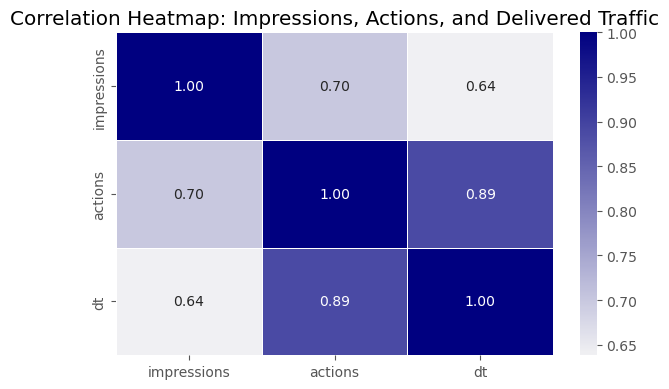

In [45]:
import seaborn as sns

# Select numeric columns for correlation
numeric_df = df[['impressions', 'actions', 'dt']]

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap=sns.light_palette("Navy", as_cmap=True), fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Impressions, Actions, and Delivered Traffic")
plt.tight_layout()
plt.show()

### Compute Historial DT and monthly DT chart

In [47]:
df

,market,strategy,channel,tactic,device type,day_of_week,date,impressions,actions,dt,state,year_month,anomaly_outlier,year,year_quarter
0,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,Retargeting,Desktop,Friday,2022-09-30,2,0.0,1.0,IL,2022-09,False,2022,2022Q3
1,"Champaign-Springfield-Decatur\, IL",Certified,Connected TV,CDP Custom audiences,Tablet,Friday,2022-09-30,2,0.0,1.0,IL,2022-09,False,2022,2022Q3
2,"Champaign-Springfield-Decatur\, IL",New Car,Banner Ads,Retargeting,Mobile,Friday,2022-09-30,1,0.0,0.0,IL,2022-09,False,2022,2022Q3
3,"Champaign-Springfield-Decatur\, IL",Certified,Connected TV,Retargeting,Tablet,Friday,2022-09-30,0,0.0,0.0,IL,2022-09,False,2022,2022Q3
4,"Champaign-Springfield-Decatur\, IL",New Car,Video,Retargeting,Desktop,Friday,2022-09-30,0,0.0,0.0,IL,2022-09,False,2022,2022Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432261,"Yakima\, WA",New Car,Banner Ads,Hand Off Targeting,Desktop,Monday,2024-09-30,338,0.0,0.0,WA,2024-09,False,2024,2024Q3
5432262,"Yakima\, WA",Certified,Video,Retargeting,Mobile,Monday,2024-09-30,10,0.0,0.0,WA,2024-09,False,2024,2024Q3
5432263,"Yakima\, WA",Certified,Connected TV,CDP Custom audiences,Mobile,Monday,2024-09-30,1,0.0,1.0,WA,2024-09,False,2024,2024Q3
5432264,"Yakima\, WA",New Car,Banner Ads,Prospecting,Tablet,Monday,2024-09-30,68,0.0,0.0,WA,2024-09,False,2024,2024Q3


In [48]:
historical_dt = df.groupby('year_month')['dt'].sum().reset_index()
historical_dt.head(5)

,year_month,dt
0,2022-09,12536.0
1,2022-10,377012.0
2,2022-11,460273.0
3,2022-12,542015.0
4,2023-01,955923.0


In [49]:
df['month'] = df['date'].dt.strftime('%B')

In [52]:
month_trends = df.groupby(['year','year_month'])['dt'].sum().reset_index()
month_trends['month_num'] = pd.to_datetime(month_trends['year_month']).dt.month

In [53]:
pivot = month_trends.pivot(index = 'month_num', columns='year', values='dt')
pivot.index = pd.to_datetime(pivot.index, format='%m').month_name()

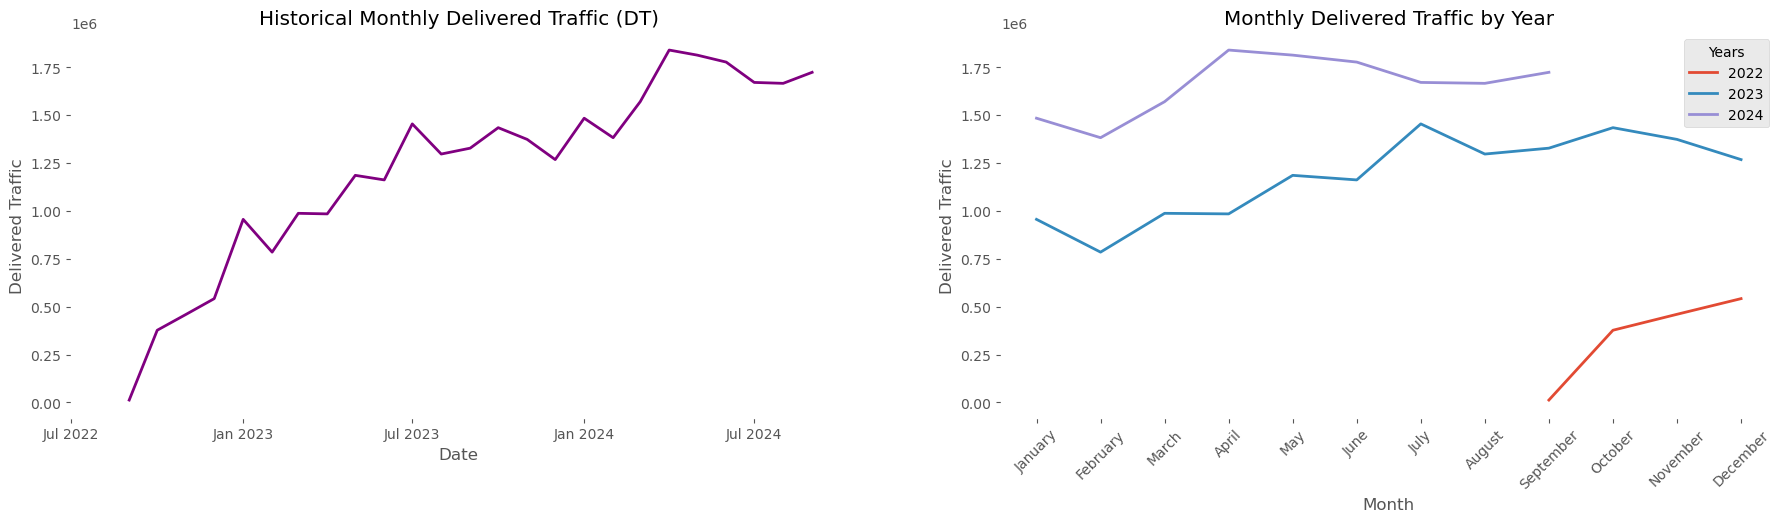

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(1, 2, figsize=(22, 5))

historical_dt['year_month'] = pd.to_datetime(historical_dt['year_month'], format='%Y-%m')
ticks = pd.to_datetime(['2022-07', '2023-01', '2023-07', '2024-01', '2024-07'])

axes[0].plot(historical_dt['year_month'], historical_dt['dt'], color='purple', linewidth=2)
axes[0].set_title('Historical Monthly Delivered Traffic (DT)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Delivered Traffic')
axes[0].set_xticks(ticks)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
axes[0].grid(False)
axes[0].set_facecolor('white')

pivot.plot(ax=axes[1], linewidth=2)
axes[1].set_title('Monthly Delivered Traffic by Year')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Delivered Traffic')
axes[1].set_xticks(range(len(pivot.index)))
axes[1].set_xticklabels(pivot.index, rotation=45)
axes[1].legend(title = 'Years')
axes[1].grid(False)
axes[1].set_facecolor('white')

In [57]:
import pandas as pd

# Aggregate DT by market, strategy, and channel combination
market_strategy_dt = df.groupby(['market', 'strategy', 'channel']).agg({
    'impressions': 'sum',
    'actions': 'sum',
    'dt': 'sum'
}).reset_index()

# Calculate DT per impression (efficiency measure)
market_strategy_dt['dt_per_impression'] = market_strategy_dt['dt'] / (market_strategy_dt['impressions'] + 1e-6)

# Sort results by highest DT and DT efficiency
top_market_strategy_dt = market_strategy_dt.sort_values(by=['dt', 'dt_per_impression'], ascending=[False, False])

# Display top 10 combinations clearly
print("Top Market-Strategy-Channel Combinations by Delivered Traffic (DT):")
display(top_market_strategy_dt.head(10))

Top Market-Strategy-Channel Combinations by Delivered Traffic (DT):


,market,strategy,channel,impressions,actions,dt,dt_per_impression
550,"New York\, NY",New Car,Banner Ads,644139744,758632.0,1429153.0,0.002219
421,"Los Angeles\, CA",New Car,Banner Ads,478783848,748123.0,1123364.0,0.002346
715,"San Francisco\, CA",New Car,Banner Ads,361016443,519737.0,787214.0,0.002181
202,"Dallas-Ft. Worth\, TX",New Car,Banner Ads,189871341,363476.0,553917.0,0.002917
831,"Washington\, DC",New Car,Banner Ads,209752016,250499.0,493421.0,0.002352
40,"Atlanta\, GA",New Car,Banner Ads,133600637,313964.0,457543.0,0.003425
157,"Chicago\, IL",New Car,Banner Ads,191779782,319439.0,448408.0,0.002338
471,"Miami- Ft. Lauderdale\, FL",New Car,Banner Ads,187912268,288349.0,403386.0,0.002147
546,"New York\, NY",Certified,Banner Ads,178625905,191219.0,349436.0,0.001956
552,"New York\, NY",New Car,Video,108115279,85580.0,326477.0,0.003020


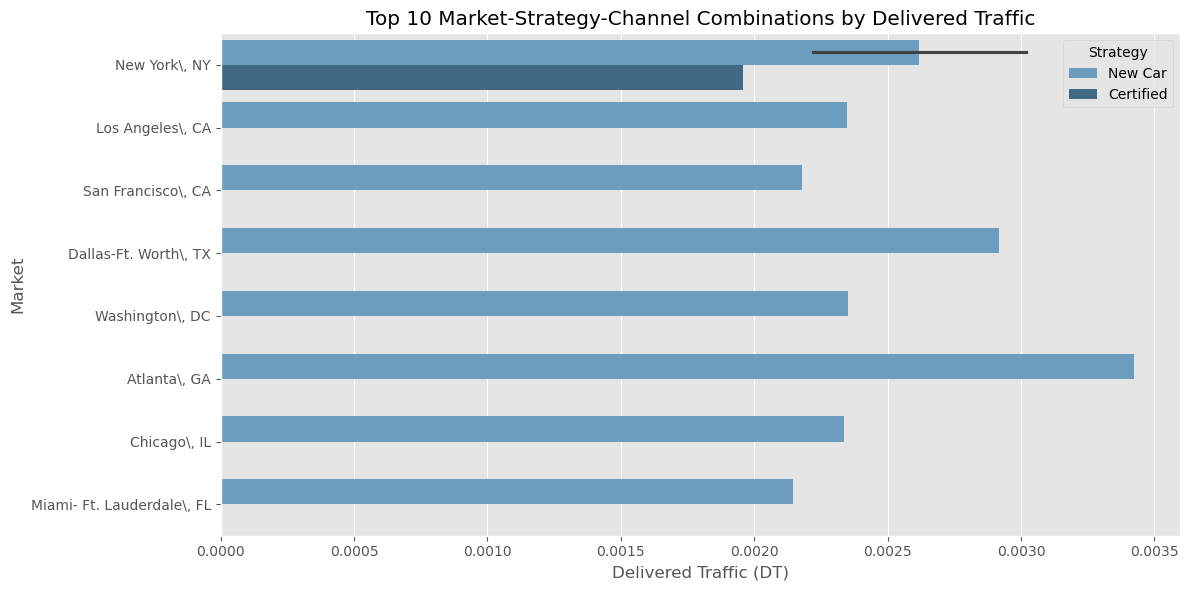

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10 = top_market_strategy_dt.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y='market', x='dt_per_impression', hue='strategy', data=top_10, palette='Blues_d')
plt.title('Top 10 Market-Strategy-Channel Combinations by Delivered Traffic')
plt.xlabel('Delivered Traffic (DT)')
plt.ylabel('Market')
plt.legend(title='Strategy')
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd

# Aggregate DT by market, strategy, and channel combination
strategy_channel_dt = df.groupby(['strategy', 'channel']).agg({
    'impressions': 'sum',
    'actions': 'sum',
    'dt': 'sum'
}).reset_index()

# Calculate DT per impression (efficiency measure)
strategy_channel_dt['dt_per_impression'] = strategy_channel_dt['dt'] / (strategy_channel_dt['impressions'] + 1e-6)

# Sort results by highest DT and DT efficiency
top_strategy_channel_dt = strategy_channel_dt.sort_values(by=['dt', 'dt_per_impression'], ascending=[False, False])

# Display top 10 combinations clearly
print("Top Strategy-Channel Combinations by Delivered Traffic (DT):\n")
display(top_strategy_channel_dt.sort_values(by='dt_per_impression', ascending=False).head(10))

Top Strategy-Channel Combinations by Delivered Traffic (DT):



,strategy,channel,impressions,actions,dt,dt_per_impression
7,New Car,Video,1244980663,962771.0,12646662.0,0.010158
3,Certified,Video,386457955,326899.0,1581784.0,0.004093
2,Certified,Connected TV,52944026,20196.0,110849.0,0.002094
5,New Car,Banner Ads,5998071627,7554488.0,12407116.0,0.002069
1,Certified,Banner Ads,1833411037,1915175.0,3529731.0,0.001925
0,Certified,Audio,98383215,16031.0,57185.0,0.000581
4,New Car,Audio,370021378,83759.0,199988.0,0.000540
6,New Car,Connected TV,0,0.0,0.0,0.000000


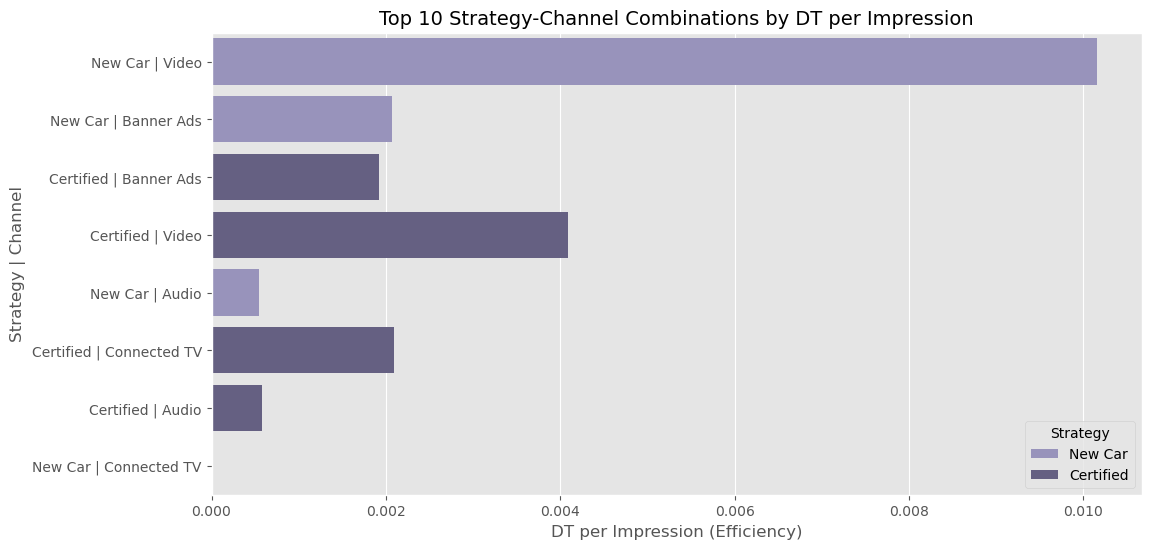

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined column clearly indicating Strategy and Channel
top_10 = top_strategy_channel_dt.head(10).copy()
top_10['strategy_channel'] = top_10['strategy'] + ' | ' + top_10['channel']

plt.figure(figsize=(12, 6))
sns.barplot(
    y='strategy_channel',  
    x='dt_per_impression',
    hue='strategy',
    data=top_10,
    palette='Purples_d'
)

plt.title('Top 10 Strategy-Channel Combinations by DT per Impression', fontsize=14)
plt.xlabel('DT per Impression (Efficiency)')
plt.ylabel('Strategy | Channel')
plt.legend(title='Strategy')
plt.show()

### Poor Areas of Performance (high impression/actions low DT)

In [42]:
state_summary = df.groupby('state').agg({
    'impressions': 'sum',
    'actions': 'sum',
    'dt': 'sum' }).reset_index()

state_summary['dt_per_impressions'] = (state_summary['dt'] / state_summary['impressions'] + 1e-6)
state_summary['actions_per_impression'] = state_summary['actions'] / (state_summary['impressions'] + 1e-6)

# Ranking out States by meterics
state_summary['rank_efficiency'] = state_summary['dt_per_impressions'].rank(ascending=True)
state_summary['rank_engagement'] = state_summary['actions_per_impression'].rank(ascending=True)
state_summary['rank_waste'] = state_summary['dt'].rank(ascending=True)

state_summary['waste_score'] = (
    state_summary['rank_efficiency'] * 0.5 +
    state_summary['rank_engagement'] * 0.3 +
    state_summary['rank_waste'] * 0.2 )

worst_states = state_summary.sort_values(by='waste_score', ascending=False)

print("Top 10 Worst Performing States (Efficiency & Engagement): \n")
display(worst_states.head(10))


Top 10 Worst Performing States (Efficiency & Engagement): 



,state,impressions,actions,dt,dt_per_impressions,actions_per_impression,rank_efficiency,rank_engagement,rank_waste,waste_score
9,GA,303923200,482739.0,1192754.0,0.003926,0.001588,30.0,42.0,37.0,35.0
0,AK,11649086,15517.0,91015.0,0.007814,0.001332,42.0,38.0,1.0,32.6
27,NV,79439490,104704.0,360816.0,0.004543,0.001318,36.0,36.0,17.0,32.2
10,IA,51614149,57055.0,251677.0,0.004877,0.001105,39.0,32.0,12.0,31.5
35,TN,219014265,221186.0,907649.0,0.004145,0.001010,33.0,24.0,33.0,30.3
11,ID,23997577,24216.0,136353.0,0.005683,0.001009,41.0,23.0,4.0,28.2
31,OR,126978651,131755.0,516789.0,0.004071,0.001038,31.0,28.0,21.0,28.1
25,NE,71885218,74449.0,300696.0,0.004184,0.001036,34.0,27.0,14.0,27.9
13,IN,128597208,110458.0,606116.0,0.004714,0.000859,37.0,11.0,28.0,27.4
26,NM,45386944,65836.0,172932.0,0.003811,0.001451,27.0,40.0,9.0,27.3


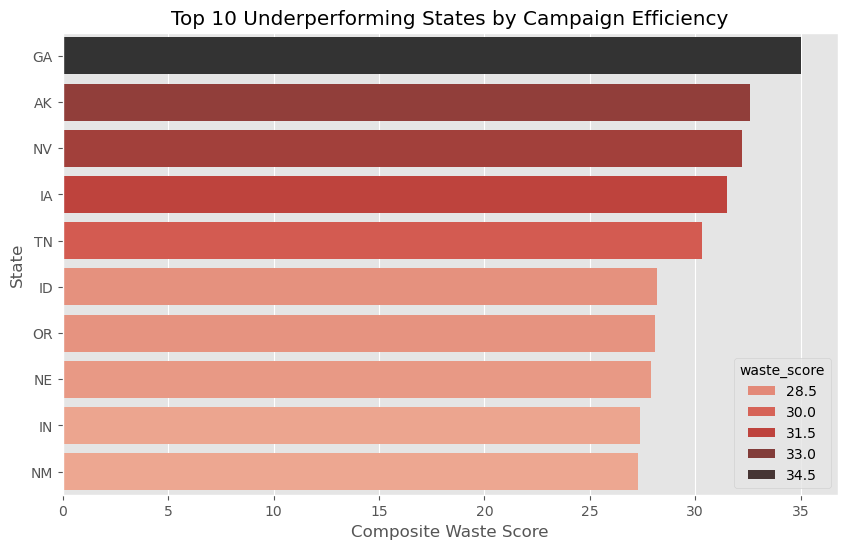

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Show only top 5 worst performers
worst10 = worst_states.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=worst10,
    x='waste_score',
    y='state',
    hue='waste_score',
    palette='Reds_d'
)

plt.title('Top 10 Underperforming States by Campaign Efficiency')
plt.xlabel('Composite Waste Score')
plt.ylabel('State')
plt.show()


### ROI Drift

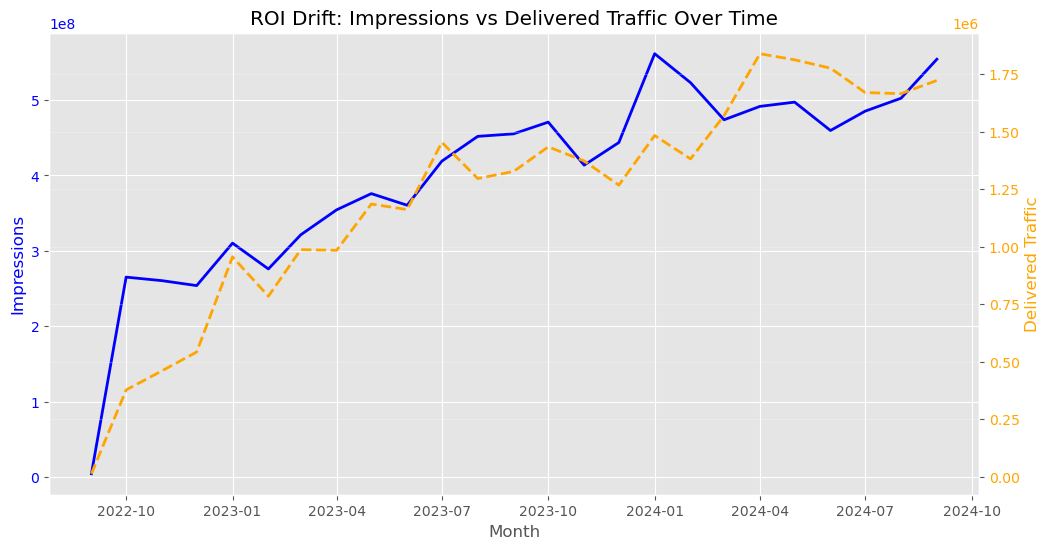

In [45]:
# Dual-Axis Plot for ROI Drift
monthly = df.groupby('year_month')[['impressions', 'dt']].sum().reset_index()
monthly['year_month'] = pd.to_datetime(monthly['year_month'])

fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis: Impressions
ax1.plot(monthly['year_month'], monthly['impressions'], label='Impressions', color='blue', linewidth=2)
ax1.set_xlabel('Month')
ax1.set_ylabel('Impressions', color='Blue')
ax1.tick_params(axis='y', labelcolor='Blue')

# Secondary axis: Delivered Traffic
ax2 = ax1.twinx()
ax2.plot(monthly['year_month'], monthly['dt'], label='Delivered Traffic', color='orange', linewidth=2, linestyle='--')
ax2.set_ylabel('Delivered Traffic', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('ROI Drift: Impressions vs Delivered Traffic Over Time')
plt.grid(True, alpha=0.25)
plt.show()


### Channel Efficiency Over Time

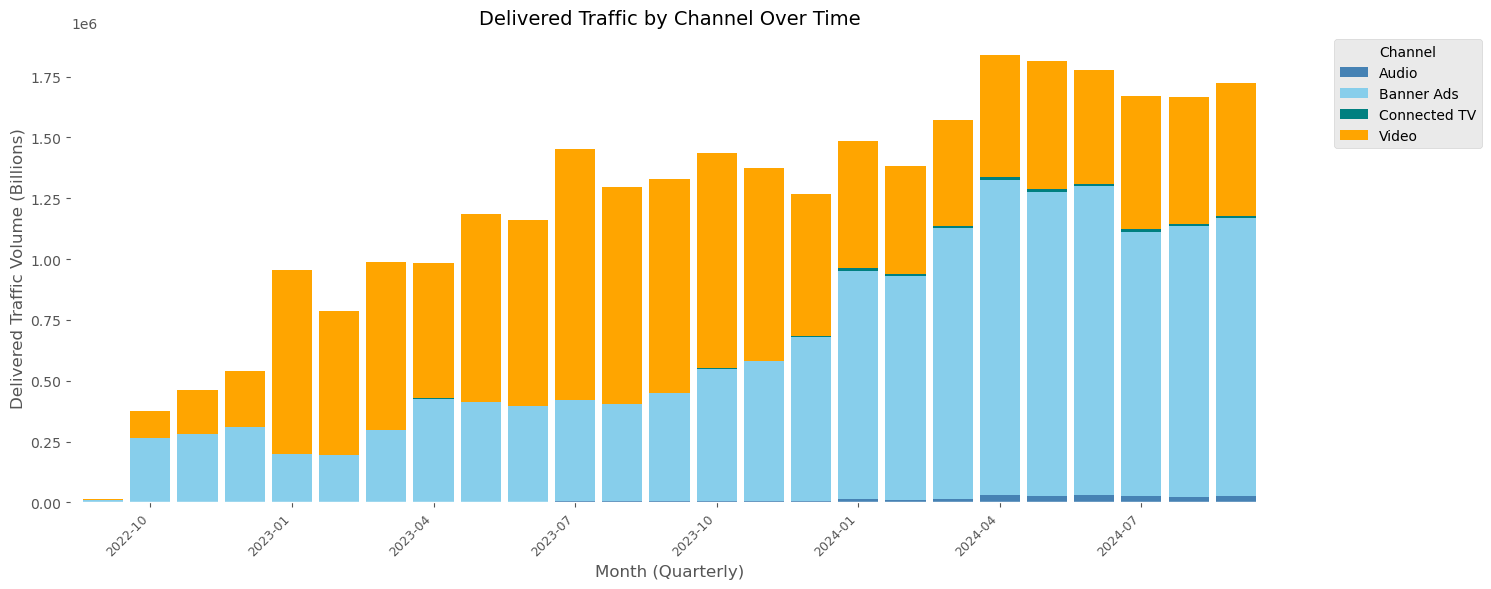

In [47]:
channel_month = df.groupby(['year_month', 'channel'])['dt'].sum().reset_index()
channel_month['year_month'] = pd.to_datetime(channel_month['year_month'])

pivot_channel = channel_month.pivot(index='year_month', columns='channel', values='dt').fillna(0)

custom_colors = {
    'Audio': 'steelblue',
    'Banner Ads': 'skyblue',
    'Connected TV': 'teal',
    'Video': 'orange'
}
color_list = [custom_colors[ch] for ch in pivot_channel.columns]


fig, ax = plt.subplots(figsize=(15, 6))
pivot_channel.plot(
    kind='bar',
    stacked=True,
    width=0.85,
    ax=ax,
    color = color_list
)

quarter_starts = pivot_channel.index[pivot_channel.index.to_series().dt.month.isin([1, 4, 7, 10])]
quarter_labels = [d.strftime('%Y-%m') for d in quarter_starts]

ax.set_xticks([pivot_channel.index.get_loc(d) for d in quarter_starts])
ax.set_xticklabels(quarter_labels, rotation=45, ha='right', fontsize=9)

ax.set_title('Delivered Traffic by Channel Over Time', fontsize=14)
ax.set_xlabel('Month (Quarterly)', fontsize=12)
ax.set_ylabel('Delivered Traffic Volume (Billions)', fontsize=12)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(False)

plt.tight_layout()
plt.show()